## NLP BERT-BERTopic (After Checkpoint)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
print(sys.path)
import seaborn as sns

sys.executable

['', '/content', '/env/python', '/usr/lib/python37.zip', '/usr/lib/python3.7', '/usr/lib/python3.7/lib-dynload', '/usr/local/lib/python3.7/dist-packages', '/usr/lib/python3/dist-packages', '/usr/local/lib/python3.7/dist-packages/IPython/extensions', '/root/.ipython']


'/usr/bin/python3'

In [ ]:
# colab 사양 체크

# ! cat /proc/cpuinfo

### Data Load

In [ ]:
%%time
# df = pd.read_csv('/content/drive/MyDrive/ML_Algorithm/datasets/medium_articles.csv')
# print(df.shape)

# df.head(10)

# 전처리 완료한 csv파일 upload
df = pd.read_csv('/content/drive/MyDrive/ML_Algorithm/datasets/Preprocessing_medium_article.csv')
df = df[int(len(df)/10):int(len(df)/5)]
print(df.shape)

df.head(10)

(19237, 8)
CPU times: user 20.8 s, sys: 5.69 s, total: 26.5 s
Wall time: 27.4 s


### nltk and gensim package import

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize, WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import re 
import nltk
import spacy

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
try:
    import gensim 
    from gensim.utils import simple_preprocess 
    import gensim.corpora as corpora 
    from gensim.models import CoherenceModel 
    import pyLDAvis
    import pyLDAvis.gensim
except:
    !pip install --upgrade pip
    !pip install bertopic
    !pip install -U sentence-transformers

### define stopwords and lemma

In [ ]:
stopwordset = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

def cleanup_sentences(sentence):
    text = re.sub('[^a-zA-z]', " ", sentence)
    text = text.lower()
    text = word_tokenize(text, language='english')
    text = [lemma.lemmatize(word) for word in text if(word) not in stopwordset]
    text = " ".join(text)

    return text

In [ ]:
# df['text_cleaned'] = df['text'].apply(cleanup_sentences)

# print(df.shape)
# df.head(10)

In [ ]:
# check point
# df.to_csv('/content/drive/MyDrive/ML_Algorithm/datasets/Preprocessing_medium_article.csv')

### Train BERTopic model
 - sentence Transformer weight?
 - what is embedding_model parameter?
 - Is there a Korean version? (and Korean topic)

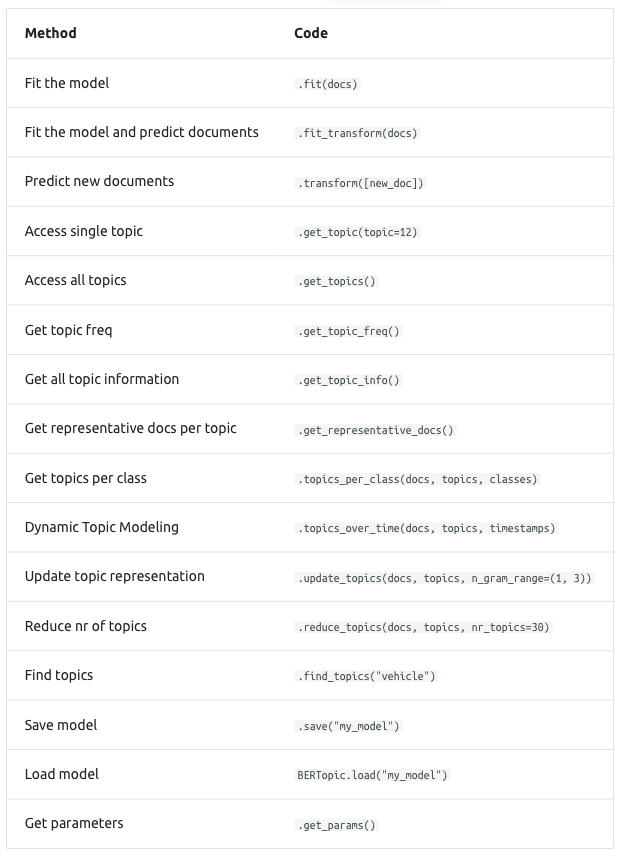

In [ ]:
import sentence_transformers
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("all-distilroberta-v1")
topic_model = BERTopic(embedding_model=sentence_model,
                       calculate_probabilities=True,
                       diversity=0.2)

Downloading:   0%|          | 0.00/737 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/9.86k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/653 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/15.7k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/329M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/333 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.1k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

In [ ]:
docs = df['text_cleaned'].to_list()

topics, probabilities = topic_model.fit_transform(docs)

In [ ]:
freq = topic_model.get_topic_info()
freq.head(10)

,Topic,Count,Name
0,-1,7923,-1_people_like_data_work
1,0,3074,0_blockchain_bitcoin_token_crypto
2,1,1183,1_love_poem_heart_life
3,2,374,2_film_movie_character_disney
4,3,295,3_trump_election_president_republican
5,4,261,4_church_christian_religion_faith
6,5,241,5_fitness_health_physical_westby
7,6,241,6_job_company_interview_career
8,7,194,7_component_div_angular_react
9,8,140,8_function_array_const_console


### Visualization

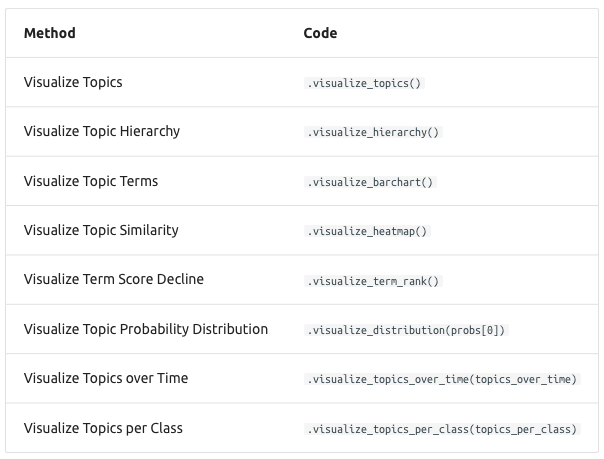

In [ ]:
topic_model.visualize_hierarchy(top_n_topics=40)

In [ ]:
topic_model.visualize_barchart()

In [ ]:
similar_topics, similarity = topic_model.find_topics("energy", top_n = 3)

In [ ]:
topic_model.get_topic(similar_topics[0])

[('climate', 0.04651267776957846),
 ('emission', 0.02411764752953918),
 ('carbon', 0.021657397472451895),
 ('water', 0.014797593748554749),
 ('change', 0.01324968665254784),
 ('gas', 0.012648048117075216),
 ('electricity', 0.009023581957484105),
 ('environmental', 0.008769909012179382),
 ('greenhouse', 0.00814045524103157),
 ('pollution', 0.006881142040141146)]

In [ ]:
topic_model.get_topic(similar_topics[1])

[('water', 0.035896984928058165),
 ('diet', 0.0317327151511212),
 ('food', 0.029955848328338436),
 ('weight', 0.025581635451341705),
 ('protein', 0.023429722523428922),
 ('fasting', 0.02340594961184026),
 ('eating', 0.021530132332347945),
 ('hydration', 0.01562551937692536),
 ('health', 0.011746539922098696),
 ('carb', 0.011705802233488787)]

In [ ]:
topic_model.get_topic(similar_topics[2])

[('universe', 0.03570094178888853),
 ('earth', 0.017901502654712236),
 ('planet', 0.016871464935009822),
 ('gravitational', 0.015354806607434737),
 ('simulation', 0.014475955185336344),
 ('quantum', 0.012716036295639678),
 ('astrology', 0.01117945643740263),
 ('gravity', 0.009348410589880089),
 ('theory', 0.008137132078257876),
 ('einstein', 0.007681864558865274)]

In [ ]:
for i in range(10):
    print(topic_model.get_topic(i))

[('blockchain', 0.014814610109908559), ('bitcoin', 0.014151994096661834), ('token', 0.010940144846335882), ('crypto', 0.010351713749023727), ('market', 0.00904238553517227), ('cryptocurrency', 0.008520479977501575), ('wallet', 0.008136028338400044), ('investor', 0.005717697015395442), ('cryptocurrencies', 0.005495639040378531), ('bank', 0.0049606621572131394)]
[('love', 0.01014763912511594), ('poem', 0.010120548214308826), ('heart', 0.009640450543434053), ('life', 0.009403281414304843), ('photo', 0.009185116272740624), ('sun', 0.007276683169047459), ('soul', 0.006215735600872784), ('night', 0.005768669117452459), ('moment', 0.005004549413165663), ('dream', 0.004921183466259724)]
[('film', 0.02682138489417317), ('movie', 0.01701645816706324), ('character', 0.01183938092519345), ('disney', 0.0070860947338617425), ('scene', 0.0070816355828419945), ('director', 0.004947805174666618), ('hollywood', 0.004646062438511111), ('actor', 0.004342283137376586), ('comic', 0.0038346892078360366), ('c

In [ ]:
topic_model.visualize_heatmap()

In [ ]:
all_topics = topic_model.get_topics()